# Mathematical Foundations

The linear model is often the first model we learn fitting data. Given a vector of inputs $X^T = (X_1, X_2, \ldots, X_p)$, we can predict the output $Y$ with the following model:

$$\hat Y = \hat \beta_0 + \sum_{j=1}^p X_j \hat \beta_j$$

Many times, it's convenient to include the vector $\textbf{1}$ in $\textbf{X}$ and include the $\hat \beta_0$ in the vector $\hat \beta$ so we may represent this linear model in vector form as an inner product:

$$\hat Y = X^T \hat \beta$$

According to this notation, $X^T$ is a row vector and $X$ is a column vector. To achieve our fit by means of Least Squares, we choose the coefficients $\beta$ to minimize the *residual sum of squares:*

$$RSS(\beta) = \sum_{i=1}^N (y_i - x_i^T \beta)^2$$

In matrix form:

$$
\begin{equation}
    RSS(\beta) = (\mathbf{y} - \mathbf{X} \beta)^T (\mathbf{y} - \mathbf{X} \beta)
\end{equation}
$$

where $\textbf{X}$ is an $N \times p$ matrix with each row being an input vector and $\textbf{y}$ is an $N$-vector of the outputs. If we differentiate with respect to $\beta$, then we obtain the following equation:

$$\textbf{X}^T (\textbf{y} - \textbf{X} \beta) = 0$$

So long as $\textbf{X}^T \textbf{X}$ is *nonsingular*, then the unique solution is given by the following equation:

$$\hat \beta = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$

where $(\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \rightarrow$ *pseudo-inverse* or *Moore–Penrose inverse*

That is to say the prediction value of the $i^{th}$ input $x_i$ is $\hat y_i = \hat y(x_i) = x_i^T \hat \beta$

# Practice

Say we generated our own data using the following rules:

$$y = 5 + 4x_1 + 3x_2 − 2x_3 + \epsilon$$

with $\epsilon \sim \mathcal{N}(0, 0.5^2)$, $x_1 \sim \mathcal{U}(0, 4)$, $x_2 \sim \mathcal{U}(1, 4)$, $x_3 \sim \mathcal{N}(3, 0.4^2)$, $𝑁 = 20$

$\mathcal{N} \rightarrow$ Normal Distribution and $\mathcal{U} \rightarrow$ Uniform Distribution

# Preamble

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Constants
np.random.seed(44)
N = 20
p = 3

# Generate Input Data

$$x_1 \sim \mathcal{U}(0, 4)$$
$$x_2 \sim \mathcal{U}(1, 4)$$
$$x_3 \sim \mathcal{N}(3, 0.4^2)$$

In [2]:
X = [[1, np.random.uniform(0, 4), np.random.uniform(1,4), np.random.normal(3, scale=0.4)] for _ in range(N)]
X = np.array(X)
X

array([[1.        , 3.33936859, 1.31438831, 2.69975411],
       [1.        , 1.43724335, 2.82771514, 3.52654293],
       [1.        , 1.5751182 , 2.22721783, 3.74351348],
       [1.        , 3.8421049 , 2.36986333, 3.03503519],
       [1.        , 1.71060608, 1.3403911 , 2.52663634],
       [1.        , 2.54732806, 1.41743876, 3.24217837],
       [1.        , 1.83481628, 3.62158956, 3.33026594],
       [1.        , 3.45069734, 1.44654419, 2.51607458],
       [1.        , 2.25179983, 1.47746579, 2.91483235],
       [1.        , 3.17829966, 3.97246804, 2.43540034],
       [1.        , 3.2200688 , 2.13224622, 2.71767879],
       [1.        , 2.84438274, 1.21752344, 3.01007254],
       [1.        , 3.53044633, 3.17817346, 3.20816395],
       [1.        , 2.78971967, 3.79030841, 3.33008896],
       [1.        , 3.526691  , 1.28491595, 2.79435513],
       [1.        , 0.43589402, 1.46120338, 1.77052447],
       [1.        , 3.93713613, 1.81468046, 2.84193637],
       [1.        , 1.22969024,

# Generate Output Data
$$y = 5 + 4x_1 + 3x_2 − 2x_3 + \epsilon$$
$$\epsilon \sim \mathcal{N}(0, 0.5^2)$$

In [4]:
def y(x1, x2, x3):
    return 5 + 4*x1 + 3*x2 - 2*x3 + np.random.normal(0,scale=0.5)

y = [y(X[i][1], X[i][2], X[i][3]) for i in range(N)]
y = np.array(y)
y

array([17.11718468, 12.61417894, 11.49941045, 22.09382466, 11.33962392,
       13.67994053, 16.56791356, 18.15543755, 12.3698036 , 24.91013347,
       19.3981462 , 14.00029869, 22.23957398, 20.55036089, 18.17014326,
        7.59544376, 20.78941751, 11.25433856, 12.3054156 , 15.84934396])

# Fit Model (Find $\hat \beta$)
$$\hat \beta = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$

$$RSS(\beta) = \sum_{i=1}^N (y_i - x_i^T \beta)^2$$

Also, the unbiased estimate for $\sigma^2$:

$$\hat \sigma^2 = \frac{1}{N - p - 1} \sum_{i = 1}^N (y_i - \hat y_i)^2$$

In [5]:
beta_hat = (np.linalg.inv(X.T @ X) @ X.T) @ y
RSS = np.sum( (y - X @ beta_hat)**2 )
sigma2_hat =  RSS/ (N - p - 1)

$\hat \beta$ = `[ 4.66154677,  3.96733899,  2.93094973, -1.7340953 ]`

$RSS$ = `3.5247737039908507`

$\hat \sigma^2$ = `0.22029835649942817`

# Generate Testing Data

In [103]:
sample_size = 30
X_test = [[1, np.random.uniform(0, 4), np.random.uniform(1,4), np.random.normal(3, scale=0.4)] for _ in range(sample_size)]
X_test = np.array(X_test)

# Find Test Values and Prediction Values

$$y_{test} = \textbf{X} \beta$$
$$y_{pred} = \textbf{X} \hat \beta$$

In [125]:
y_test = X_test @ [5, 4, 3, -2]
y_pred = X_test @ beta_hat

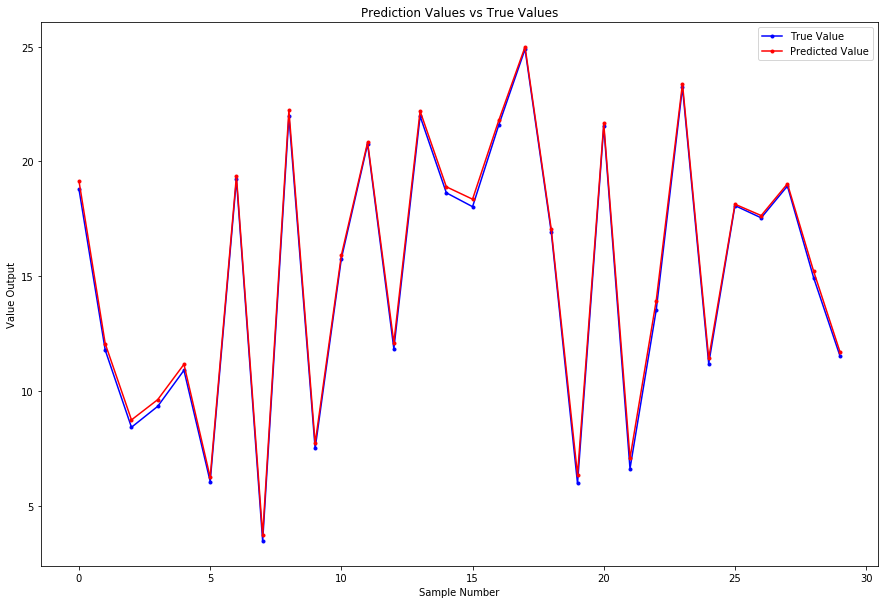

In [128]:
plt.figure(figsize = (15,10))
plt.plot(y_test, 'b.-', label='True Value')
plt.plot(y_pred, 'r.-', label='Predicted Value')
plt.title("Prediction Values vs True Values")
plt.xlabel("Sample Number")
plt.ylabel("Value Output")
plt.legend()
plt.show()

# Using Scikit-Learn Library

In [130]:
# Import Package
from sklearn.linear_model import LinearRegression

# Fit Model
lm = LinearRegression(fit_intercept=False).fit(X, y)
print(f'beta_sklearn = {lm.coef_}')
print(f'coefficient_of_determination = {lm.score(X, y)}')

beta_sklearn = [ 4.66154677  3.96733899  2.93094973 -1.7340953 ]
coefficient_of_determination = 0.9912772830386247


In [131]:
y_pred_sklearn = lm.predict(X_test)

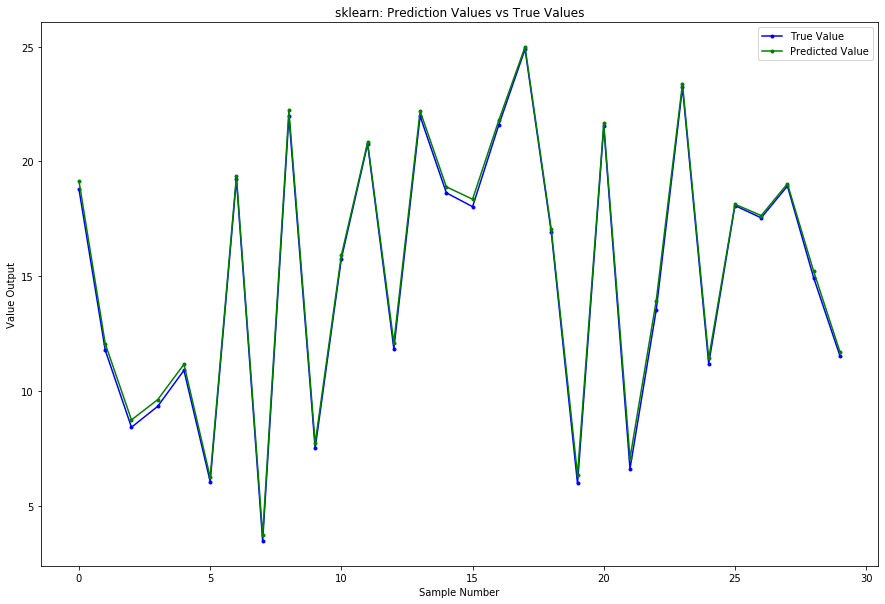

In [134]:
plt.figure(figsize = (15,10))
plt.plot(y_test, 'b.-', label='True Value')
plt.plot(y_pred_sklearn, 'g.-', label='Predicted Value')
plt.title("sklearn: Prediction Values vs True Values")
plt.xlabel("Sample Number")
plt.ylabel("Value Output")
plt.legend()
plt.show()

# Confidence Interval for $\hat \beta$

### Variance of $\hat \beta$

We learned above that the estimator $\hat \beta$ can written as:

$$\hat \beta = (X^T X)^{-1} X^T y$$

It is worth mentioning that this is an unbiased estimator: $E\left[\hat \beta\right] = \beta$. From this we can write:

$$Var\left[\hat \beta\right] = E\left[\hat \beta^2\right] - E\left[\hat \beta\right] \cdot E\left[\hat \beta^T\right]$$

$$Var\left[\hat \beta\right] = E\left[\left(\left(X^T X\right)^{-1} X^T y\right)^2\right] - \hat \beta^2$$

The underlying true regression is:

$$y = \textbf{X} \beta + \epsilon$$

Plug the information about $y$ into the expression for $Var\left[\hat \beta\right]$:

$$E\left[\left(\left(X^T X\right)^{-1} X^T y\right)^2\right] - \hat \beta^2 = E\left[\left(\left(X^T X\right)^{-1}X^T\left(X \beta + \epsilon\right)\right)^2\right] - \beta^2$$

$$E\left[\left(\left(X^T X\right)^{-1}X^T X \beta + (X^T X)^{-1} X^T \epsilon\right)^2\right] - \beta^2$$

where $\left(X^T X\right)^{-1}X^T X \rightarrow 1$

$$E\left[\left(\beta + (X^T X)^{-1} X^T \epsilon\right)^2\right] - \beta^2$$

$$\beta^2 + E\left[\left((X^T X)^{-1} X^T \epsilon\right)^2\right] - \beta^2$$

Since $E\left[\epsilon\right] = 0$ and the $\beta^2$ cancels out:

$$Var\left[ \hat \beta \right] = \left(\left(X^T X\right)^{-1} X^T\right)^2 E\left[\epsilon^2\right]$$

We assume that $E\left[ \epsilon^2 \right] = \sigma^2$. Therefore, the variance of $\hat \beta$ becomes:

$$Var\left[ \hat \beta \right] = \sigma^2 (X^T X)^{-1}$$

The variance of $\hat \beta$ is independent of the true coefficients $\beta$.



### Confidence Interval

$$\hat \beta_j \pm t_{\frac{\alpha}{2}, N-p-1} \sqrt{C_{jj} \sigma^2}$$

where $C_{jj}$ are the diagonal elements of the covariance matrix $\rightarrow (X^T X)^{-1}$

In [156]:
# Variance of Beta
var_beta = np.diag(sigma2_hat * np.linalg.inv(X.T @ X ))
print(f'variance_beta = \n {var_beta}')

# Use 2.12 for the t statistic (alpha = 0.05)
beta_interval = np.c_[beta_hat - 2.12 * np.sqrt(var_beta), beta_hat + 2.12 * np.sqrt(var_beta)]
print(f'beta_interval = \n {beta_interval}')

variance_beta = 
 [0.5786609  0.01103045 0.01555414 0.0683109 ]
beta_interval = 
 [[ 3.04886778  6.27422577]
 [ 3.74468396  4.18999402]
 [ 2.66655126  3.19534819]
 [-2.28818602 -1.18000458]]


## References

* `Friedman, Jerome, Trevor Hastie, and Robert Tibshirani. The elements of statistical learning. Vol. 1, no. 10. New York: Springer series in statistics, 2001.`
* `Majte. How to derive variance-covariance matrix of coefficients in linear regression. Cross Validated. [https://stats.stackexchange.com/q/86104] (version: 2019-01-08)`